# NMF for Keyword Extraction
- Non negative matrix functions are used as a dimensionality reduction technique for keywrod extraction and text processing
- This notebook will contain very specific information on how to run this code and how these individual processes work

## Imports
- A seperate data loading Python script will be shared on how to load create this CSV
- The CSV is then placed in the same directory
- Make sure as with all the packages in this notebook to run `pip install [package_name_here]` to download the packages for importing. If there are bugs, all these packages have documentation on their installation processes and documentation

In [3]:
import pandas as pd
df = pd.read_csv('titles_data.csv')

print(df.head())

                                               Title          Query
0                         South America  Google News  South America
1  South American trade bloc Mercosur holds summi...  South America
2  Minnesota National Guard Deploying to South Am...  South America
3  Extreme weather in Latin America unlocks vicio...  South America
4  Volkswagen aims to grow 40 in S America throug...  South America


# Preprocessing
- Preprocessing data for NMF algorithms requires removing stop words and punctuation, lowercasing words, and tokenizing the text
- This code below uses the `nltk` module which is fairly useful for machine learning preprocessing techniques related to natural language processing

In [6]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string


nltk.download('stopwords')
nltk.download('punkt')


stop_words = set(stopwords.words('english'))


def preprocess_title(title):
    title = title.lower()
    tokens = word_tokenize(title)
    tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    preprocessed_title = ' '.join(tokens)

    return preprocessed_title

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tyler\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tyler\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
df['Preprocessed Title'] = df['Title'].apply(preprocess_title)
print(df['Preprocessed Title'])

0                               south america google news
1       south american trade bloc mercosur holds summi...
2       minnesota national guard deploying south ameri...
3       extreme weather latin america unlocks vicious ...
4       volkswagen aims grow 40 america ev subscriptio...
                              ...                        
1214    us trying mend ties venezuela one big reason o...
1215    decade maduro migration marks venezuelans live...
1216    venezuelas juan guaidó seeks support washingto...
1217    joint statement venezuela negotiations united ...
1218    opinion venezuelas crisis must resolved peacef...
Name: Preprocessed Title, Length: 1219, dtype: object


## Vectorizer
- Forming a TF-IDF matrix prior to applying the NMF is a necessary step in order to vectorize text, which is necessary for machine learning processes.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['Preprocessed Title'])

## NMF
- Applying the NMF
- `n_topics` and `n_keywords` can be altered depending on preference
- `random_state` is also arbitrary, but is set for repeatability of the experiment

In [26]:
from sklearn.decomposition import NMF
n_topics = 10
nmf_model = NMF(n_components=n_topics, random_state=42)
nmf_model.fit(tfidf_matrix)

C:\Users\tyler\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


NMF(n_components=10, random_state=42)

In [28]:
feature_names = vectorizer.get_feature_names()
keywords = []
n_keywords = 5

for topic_idx, topic in enumerate(nmf_model.components_):
    top_indices = topic.argsort()[:-n_keywords-1:-1]
    top_keywords = [feature_names[index] for index in top_indices]
    keywords.append(top_keywords)
    
for i, topic_keywords in enumerate(keywords):
    print(f"Topic {i+1} Keywords: {', '.join(topic_keywords)}")

Topic 1 Keywords: google, news, chile, bolivia, argentina
Topic 2 Keywords: reuters, canada, institute, bolivia, argentina
Topic 3 Keywords: america, south, latin, market, american
Topic 4 Keywords: prensa, latina, la, bolivia, venezuelan
Topic 5 Keywords: english, bnamericas, telesur, al, jazeera
Topic 6 Keywords: us, uruguay, embassy, mercopress, fulton
Topic 7 Keywords: brazil, world, espn, cup, ancelotti
Topic 8 Keywords: peru, 2023, reliefweb, ecuador, wfp
Topic 9 Keywords: suriname, international, monetary, fund, imf
Topic 10 Keywords: venezuela, united, states, department, state


## Wordcloud Visualization

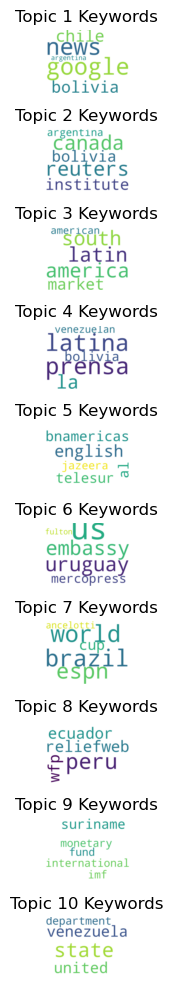

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Set the number of topics
num_topics = len(keywords)

# Generate word clouds for each topic
fig, axs = plt.subplots(nrows=num_topics, figsize=(10, 10))

for i in range(num_topics):
    wordcloud = WordCloud(width=800, height=600, background_color='white').generate(' '.join(keywords[i]))
    axs[i].imshow(wordcloud, interpolation='bilinear')
    axs[i].set_title(f"Topic {i+1} Keywords")
    axs[i].axis('off')

plt.tight_layout()
plt.show()